In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ioai-2025-preparation-class-lesson-1-homework/sample_submission.csv
/kaggle/input/ioai-2025-preparation-class-lesson-1-homework/train.csv
/kaggle/input/ioai-2025-preparation-class-lesson-1-homework/test.csv
/kaggle/input/ekkfkekd/result (12) (1).csv


In [2]:
!pip install numpy pandas optuna catboost seaborn imblearn

ERROR: Could not find a version that satisfies the requirement imblearn (from versions: none)
ERROR: No matching distribution found for imblearn


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier, Pool
import optuna
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import f1_score, roc_auc_score

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder

In [5]:
train = pd.read_csv('/kaggle/input/ioai-2025-preparation-class-lesson-1-homework/train.csv')
test = pd.read_csv('/kaggle/input/ioai-2025-preparation-class-lesson-1-homework/test.csv')
train

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,age,country,city,school,faculty,student_id,sociodemographics,test_score,application_id,personal_statement,accepted
0,24,Россия,Санкт-Петербург,9,0,7127004,1f63c614a798186e5b5dbca02201a070,21.0,06c4288fba116e49f49d82a16184fca6,NaN,0.0
1,21,Казахстан,Астана,5,0,6264436,99fec0c12216abee9eec3bee2138754f,29.0,45273a0d372f7f2747afc98bdc63c31a,NaN,1.0
2,17,Россия,Тула,3,0,9056805,f733e24fc7ae975aab7c3e092b1ae96c,89.0,773c820049150b6854691b5e7fdcd63f,NaN,0.0
3,20,Украина,Киев,1,0,8857612,a2b7795cd58502654754ce03163a1685,2.0,d07f757f1b51f8b9189a84298b142794,NaN,0.0
4,19,Россия,Пермь,8,0,6422527,90519fbbfd457329160e9c1767cb0a86,23.0,269f19b2ef9f46af5012931bfd4acf22,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
95995,21,Россия,Улан-Удэ,5,5,2019496,e065aa14d0861cb2e8c227049bc0b1d3,73.0,4c33d89befc11bea800221a9d8719549,NaN,1.0
95996,18,Казахстан,Шымкент,9,5,1202270,de6753fb488b87117296d8bef2edc7b3,91.0,b76e187984d8b80264b4c97fac124f84,NaN,0.0
95997,18,Россия,Владивосток,14,5,4114792,7ebd9ffcf2f9f0fbe6cfd54917af2098,31.0,750e34ebbf17be247c9184149109cbdd,NaN,1.0
95998,20,Украина,Запорожье,2,5,5024696,a2b7795cd58502654754ce03163a1685,45.0,0a17ffcb17a2ffd2eb185ac793ed444e,NaN,1.0


In [6]:
train = train.drop(columns='personal_statement')
test = test.drop(columns=['ID', 'personal_statement'])

In [7]:
train['accepted'].value_counts() #0 в два раза больше 1
train.duplicated().sum() #0
df=train

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'school'}>],
       [<Axes: title={'center': 'faculty'}>,
        <Axes: title={'center': 'student_id'}>],
       [<Axes: title={'center': 'test_score'}>,
        <Axes: title={'center': 'accepted'}>]], dtype=object)

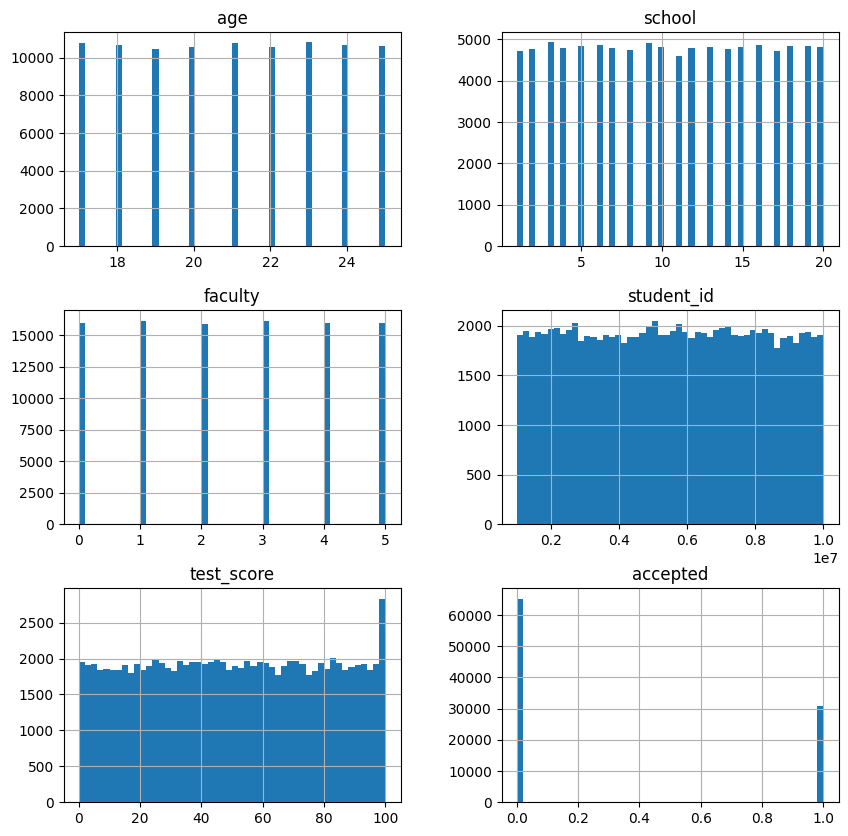

In [8]:
train.hist(bins=50, figsize=(10, 10))

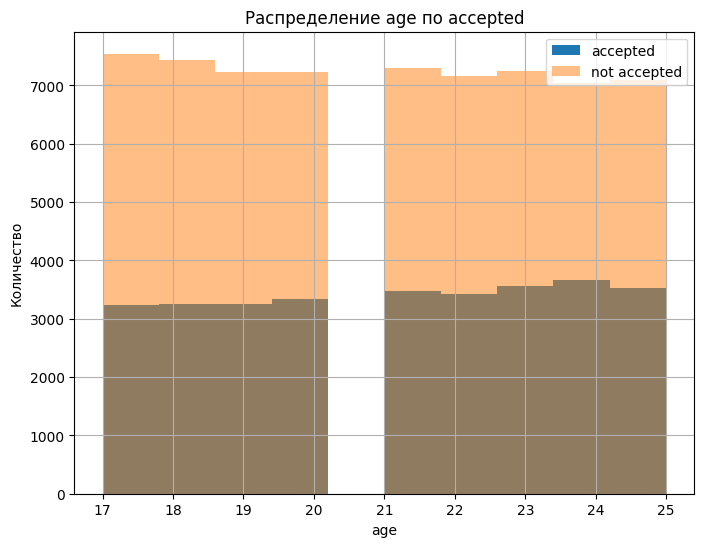

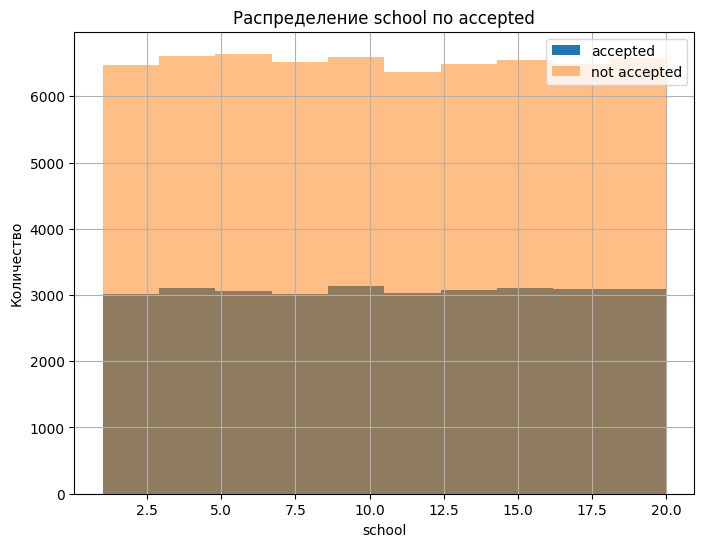

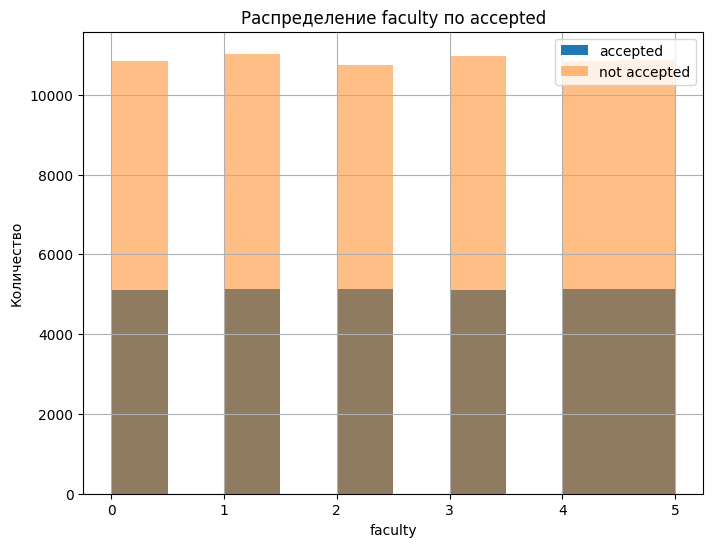

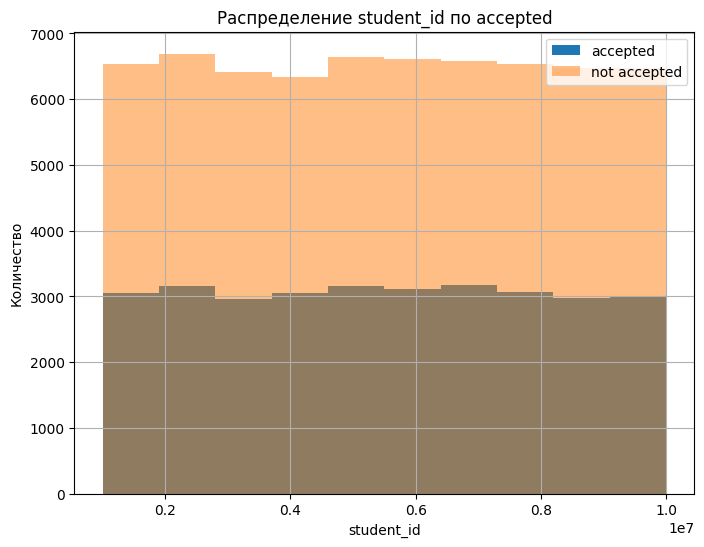

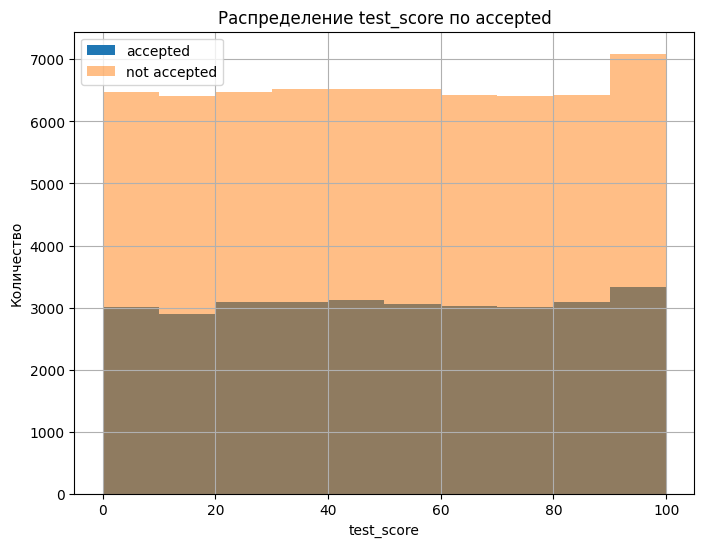

In [9]:
for column in df.select_dtypes(include=['number']).columns:
    if column != 'accepted':
        plt.figure(figsize=(8, 6))
        df[df['accepted'] == 1][column].hist(alpha=1, label='accepted') # alpha - прозрачность
        df[df['accepted'] == 0][column].hist(alpha=0.5, label='not accepted')
        plt.xlabel(column)
        plt.ylabel('Количество')
        plt.title(f'Распределение {column} по accepted')
        plt.legend()
        plt.show()


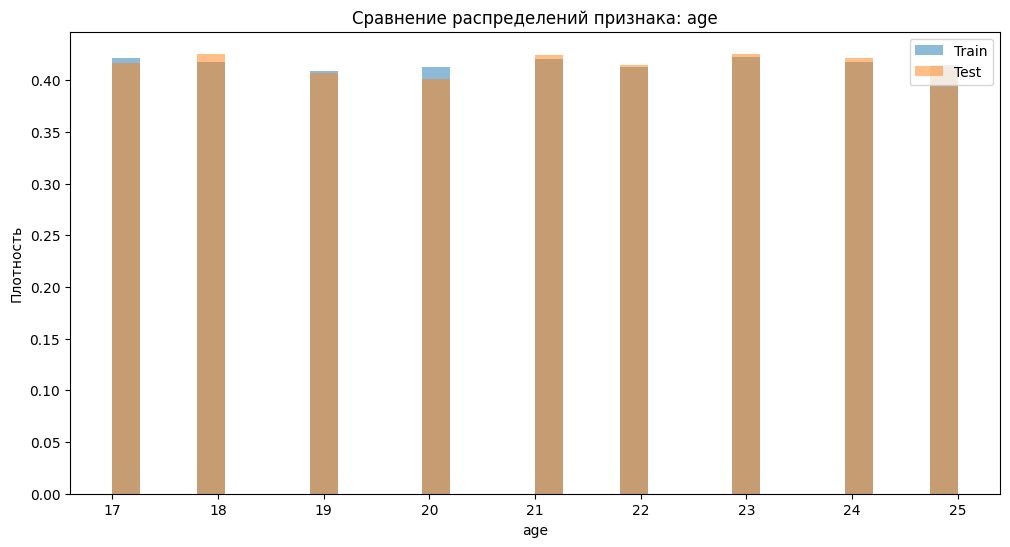

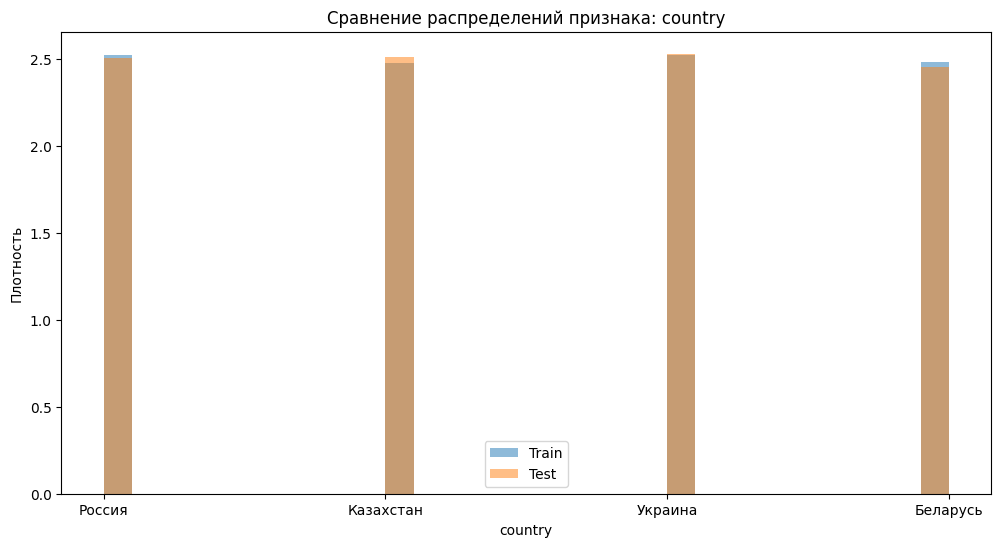

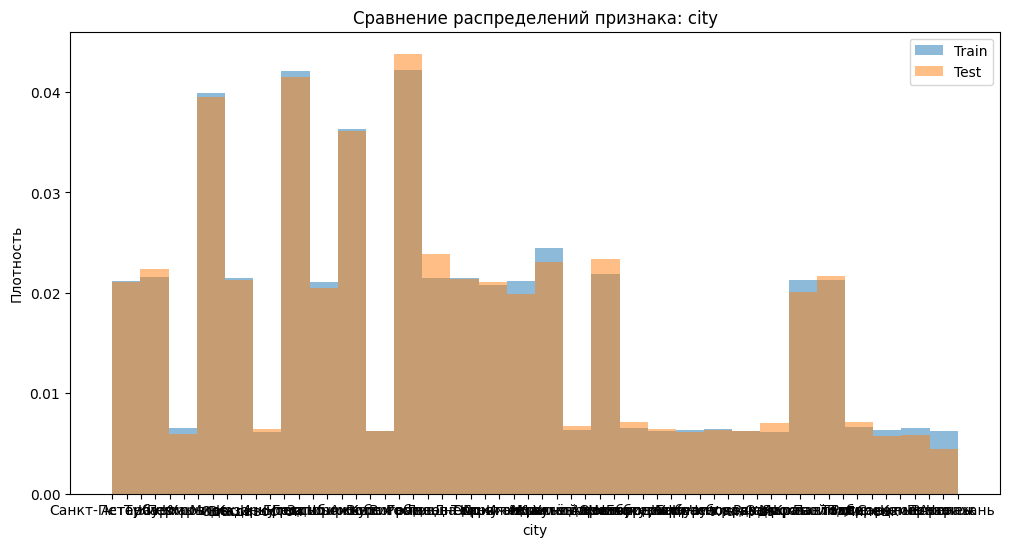

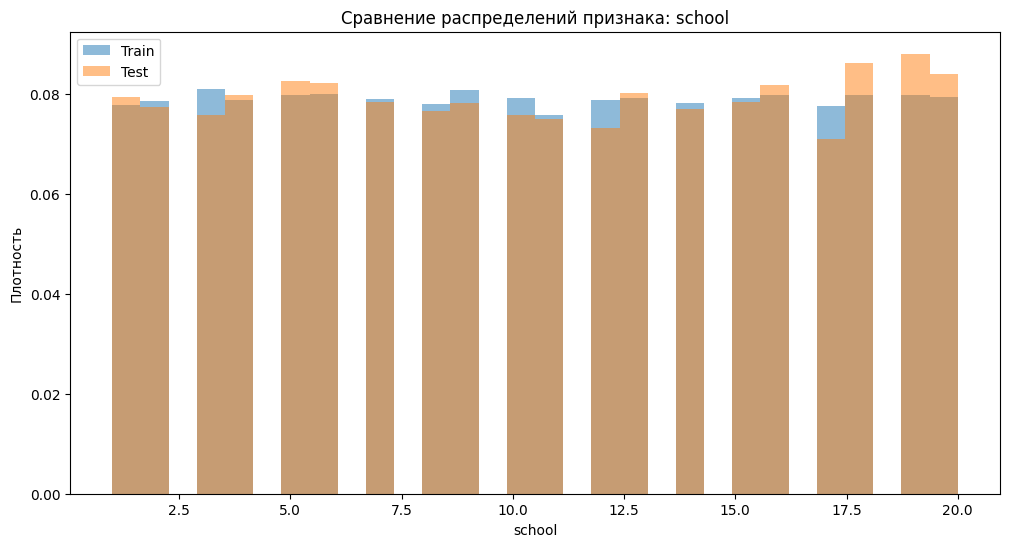

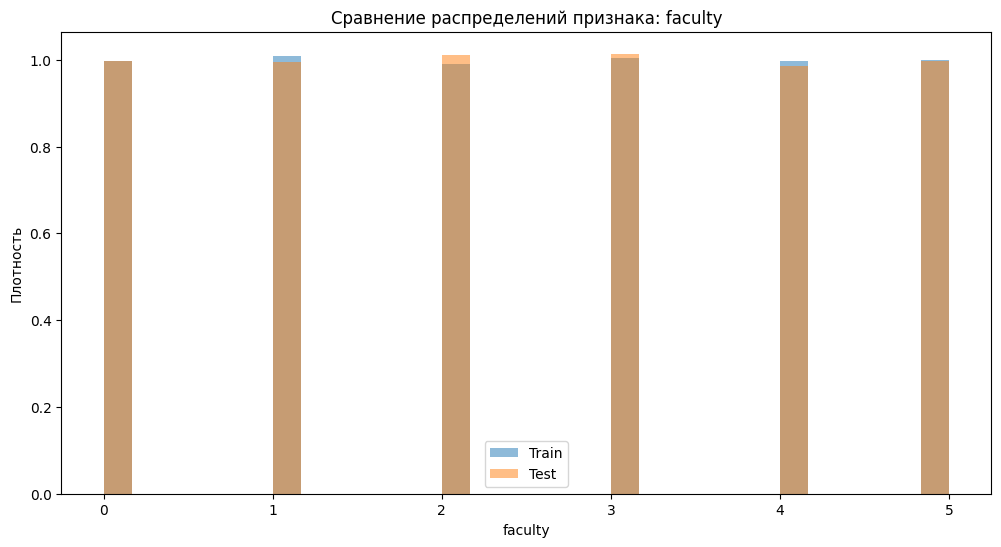

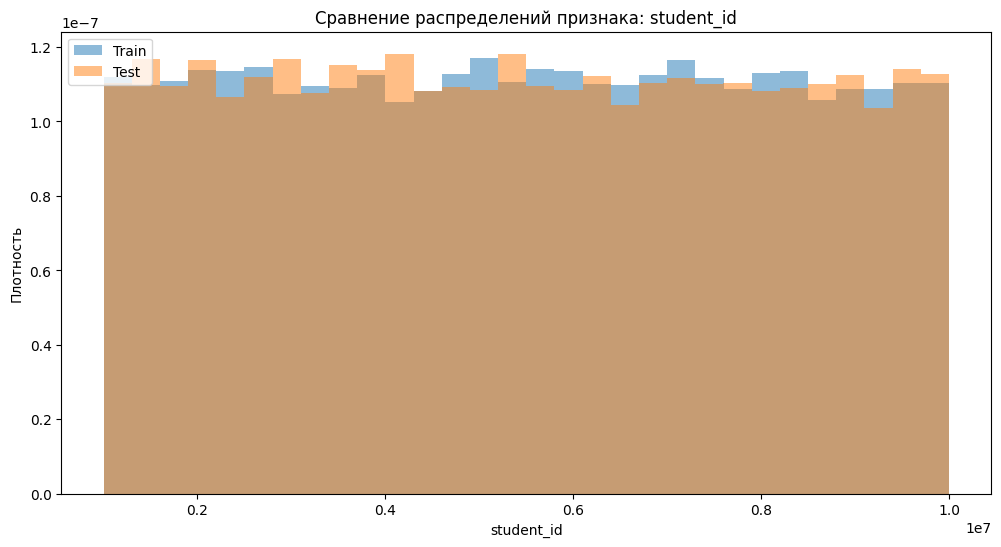

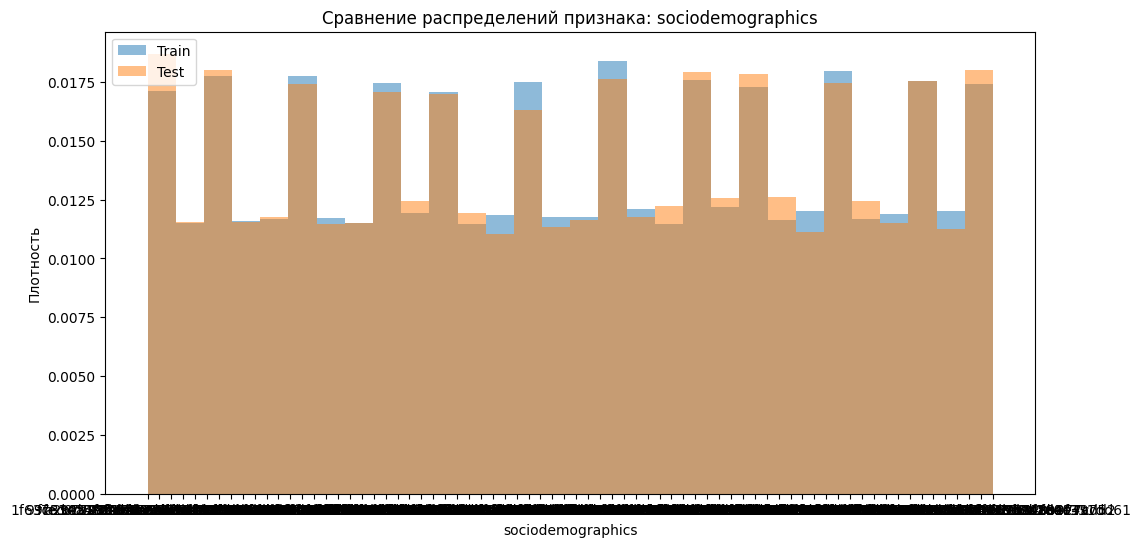

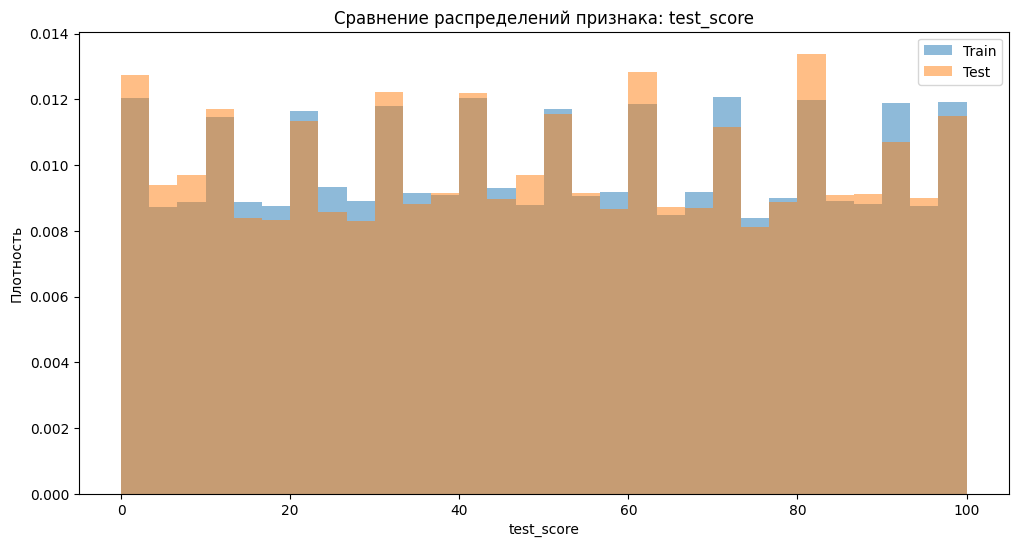

In [10]:
for column in df.drop(columns='application_id').columns:
    if column != 'accepted':
      feature = column
      plt.figure(figsize=(12, 6))
      plt.hist(train[feature], bins=30, alpha=0.5, label='Train', density=True)
      plt.hist(test[feature], bins=30, alpha=0.5, label='Test', density=True)
      plt.title(f'Сравнение распределений признака: {feature}')
      plt.xlabel(feature)
      plt.ylabel('Плотность')
      plt.legend()
      plt.show()

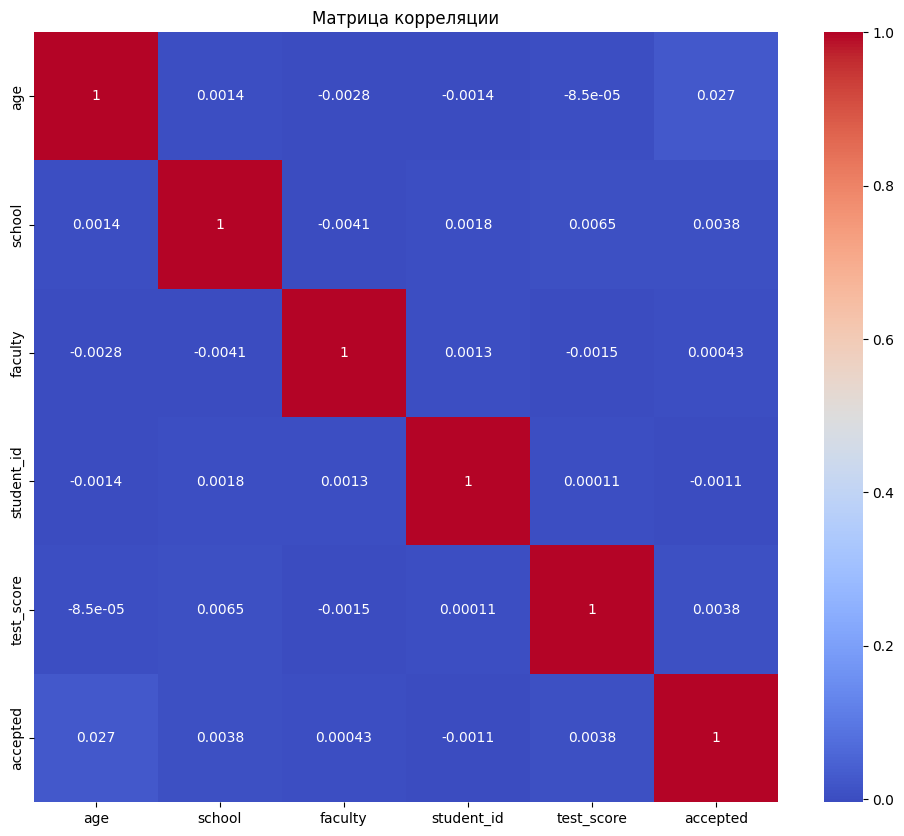

In [11]:
numeric_df = df.select_dtypes(include=['int64', 'float64', 'int32', 'float32']) # и другие числовые типы, если есть
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

Насчет лика:

  Там 16138 student_id встречаются 2 раза (остальные 79 862 значения встречаются единожды). Фактически, по их значениям можно понять, что в тесте (если один раз его отклонили, а второй приняли в трейне => в тесте его отклонили. При условии двух отказов вряд ли можно использовать этот лик, так как и на третий могут не взять), но в тесте они пересекаются лишь 40 раз из 24000. Это небольшой лик + значений, который можно точно опознать (если его приняли все-таки в трейне) будет чуть меньше 40 тогда. 

  Также некоторые student_id имеют разную информацию (из разных городов, стран, школ, поступают на разные факультеты, а подразумевается, что это один человек). Как итог: для надежности еще сравниваем application_id, потому что у этого признака супер похожая с student_id ситуация.

In [12]:
student_counts = df['application_id'].value_counts()

duplicate_students = student_counts[student_counts > 1]
k = 0
print("Student ID's that appear more than once:")
for student_id, count in duplicate_students.items():
    accepted_values = df[df['application_id'] == student_id]['accepted'].unique()
    if len(accepted_values) == 1:
      k += 1
    print(f" {student_id}: Count - {count}, Accepted values - {accepted_values}")

Student ID's that appear more than once:
 ac1900771ed215a91c333c03e1b58424: Count - 4, Accepted values - [1. 0.]
 8c1ff56a1d82d34df22850a96f6f9f04: Count - 4, Accepted values - [0. 1.]
 6cb5bd6556fe31110062d4086e898487: Count - 3, Accepted values - [1. 0.]
 0ac84af666cafe8a2fbafc37e25eec8a: Count - 3, Accepted values - [1. 0.]
 7392a0b6fdca16a41237fd777e36b091: Count - 3, Accepted values - [1. 0.]
 3ebc87687377a7349f8bcfaca146a6af: Count - 3, Accepted values - [0. 1.]
 41f6d89c713c6930ec49c5134e0e6e09: Count - 3, Accepted values - [1. 0.]
 0e93051e55730fc180af350ad94cfad8: Count - 3, Accepted values - [1. 0.]
 9c09459e0e44d8231e625a55a165ab17: Count - 3, Accepted values - [1. 0.]
 affa068e3801f4ded7daa50d023482d3: Count - 3, Accepted values - [0. 1.]
 2850e9b705259521841e215c43806f40: Count - 3, Accepted values - [0. 1.]
 e5d81647ff48e239a883a0217a2f96b7: Count - 3, Accepted values - [0. 1.]
 353ef8f65bc9c852b3892c9c55a578ba: Count - 3, Accepted values - [0. 1.]
 f9901d69fee9dfa7654f1a

In [13]:
duplicate_in_test

NameError: name 'duplicate_in_test' is not defined

In [ ]:
student_counts = df['student_id'].value_counts()

duplicate_students = student_counts[student_counts > 1]
k = 0
print("Student ID's that appear more than once:")
for student_id, count in duplicate_students.items():
    accepted_values = df[df['student_id'] == student_id]['accepted'].unique()
    if len(accepted_values) == 1:
      k += 1
    print(f" {student_id}: Count - {count}, Accepted values - {accepted_values}")

duplicate_in_test = duplicate_students.index.isin(test['student_id'])

In [ ]:
df[df['application_id'] == 'ac1900771ed215a91c333c03e1b58424']

In [ ]:
# Подсчет количества вхождений каждой комбинации (student_id, application_id)
combined_counts_train = train.groupby(['student_id', 'application_id']).size().reset_index(name='counts')
# Фильтрация комбинаций, которые встречаются больше 1 раза
duplicate_combinations_train = combined_counts_train[combined_counts_train['counts'] > 1]
duplicate_combinations_train

In [ ]:
combination_accepted_dict = {}

for index, row in duplicate_combinations_train.iterrows():
    student_id = row['student_id']
    application_id = row['application_id']
    accepted_values = train[(train['student_id'] == student_id) & (train['application_id'] == application_id)]['accepted'].unique()
    
    if len(accepted_values) > 1: 
        if 1 in accepted_values:
            combination_accepted_dict[(student_id, application_id)] = 0

In [ ]:
indices_to_replace = []

for (student_id, application_id), accepted_value in combination_accepted_dict.items():
    mask = (test['student_id'] == student_id) & (test['application_id'] == application_id)
    indices = test.loc[mask].index.tolist()
    indices_to_replace.extend(indices)

In [ ]:
indices_to_replace

In [ ]:
preds = pd.read_csv('/kaggle/input/ekkfkekd/result (12) (1).csv')

In [ ]:
#Применение 
preds.loc[indices_to_replace, "accepted"] = 0

In [ ]:
preds.to_csv('resultt.csv', index=False)

Предобработка

In [ ]:
df = train
X = df.drop(columns=['accepted'])
y = df['accepted']

In [ ]:
big_data = pd.concat([X, test])

In [ ]:
categorical_features = ['country', 'city', 'sociodemographics', 'application_id']

for feature in categorical_features:
    le = LabelEncoder()
    big_data[feature] = le.fit_transform(big_data[feature])

In [ ]:
def aaa(df):
  df['test_score_squared'] = df['test_score'] * 2
  df['test_score_log'] = np.log1p(df['test_score']) # log(1+x) 
  df['test_score_sqrt'] = np.sqrt(df['test_score'])
  df['age_squared'] = df['age'] * 2
  for column in ['test_score', 'age', 'test_score_squared', 'test_score_sqrt','age_squared']: # Список числовых столбцов
      df[f'{column}_log'] = np.log1p(df[column])

  df['age_exp'] = np.exp(df['age'])
  df['test_score_exp'] = np.exp(df['test_score'])

  df['age_sin'] = np.sin(df['age'])
  df['age_cos'] = np.cos(df['age'])
  df['test_score_cos'] = np.cos(df['test_score'])
  df['test_score_sin'] = np.sin(df['test_score'])

  for col in ['student_id', 'application_id', 'sociodemographics']:
      freq_encoding = df[col].value_counts(normalize=True) # normalize=True для относительных частот
      df[f'{col}_freq'] = df[col].map(freq_encoding)

  df['school_mean_test_score'] = df.groupby('school')['test_score'].transform('mean')
  df['school_faculty_mean_test_score'] = df.groupby(['school', 'faculty'])['test_score'].transform('mean')
  return df

In [ ]:
aaa = aaa(big_data)

In [ ]:
X = big_data.iloc[:96000].copy()
test = big_data.iloc[96000:].copy()

In [ ]:
smote = SMOTE(random_state=0)
X, y = smote.fit_resample(X, y)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

Catboost

In [ ]:
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 50, 1400),
        'depth': trial.suggest_int('depth', 4, 12),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),
        'verbose': 1,
        'eval_metric': 'AUC',
        'random_seed': 42,
        'use_best_model': True,
        'devices':'cuda',
        'loss_function':'Logloss',
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100)
        }

    train_pool = Pool(X_train, y_train)
    valid_pool = Pool(X_valid, y_valid)

    model = CatBoostClassifier(**params)
    model.fit(train_pool, eval_set=valid_pool, early_stopping_rounds=25)

    preds = model.predict(X_valid)
    roc = roc_auc_score(y_valid, preds)

    return roc

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

best_trial = study.best_trial
print(f"Лучшие параметры: {best_trial}")

In [ ]:
best_params = study.best_params
print(f"Лучшие параметры: {best_params}")

In [ ]:
train_pool = Pool(X_train, y_train)
test_pool = Pool(X_valid, y_valid)


best_model = CatBoostClassifier(**best_params,
                                eval_metric= 'AUC',
                                random_seed= 42,
                                use_best_model= True,
                                devices='cuda',
                                loss_function='Logloss')
best_model.fit(train_pool, eval_set=test_pool, early_stopping_rounds=30)

In [ ]:
y_pred = best_model.predict(test_pool)
accuracy = roc_auc_score(y_valid, y_pred)
print(f"Accuracy: {accuracy}")

feature_importances = pd.Series(best_model.get_feature_importance(train_pool), index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Важность признаков (CatBoost)')
plt.show()


In [ ]:
pd.Series(binary_predictions).value_counts()

In [ ]:
test_pool = Pool(test)

In [ ]:
preds = best_model.predict_proba(test_pool)[:,1]

In [ ]:
preds

In [ ]:
threshold = 0.3
binary_predictions = np.where(preds > threshold, 1, 0)

In [ ]:
result = pd.DataFrame()
result['ID'] = pd.read_csv('/kaggle/input/ioai-2025-preparation-class-lesson-1-homework/test.csv')['ID']
result['accepted'] = binary_predictions
result.to_csv('result.csv', index=False)

 Стекинг (недоделанный)

In [ ]:
estimators = [
    ('catboost', CatBoostClassifier(random_state=42)),
    ('lgbm', LGBMClassifier(random_state=42)),
]


stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    stack_method='predict_proba'
)


In [ ]:
stacking_model.fit(X_train, y_train)